## Fast MC plotting ##

In [1]:
import sys
sys.path.insert(0, "../python/")

import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

Load the .json file with the Monte Carlo result

In [2]:
df = pd.read_json('../mcdata/mc_reduce_variance.json').dropna()

Plot the hit position

Text(0, 0.5, 'z (cm)')

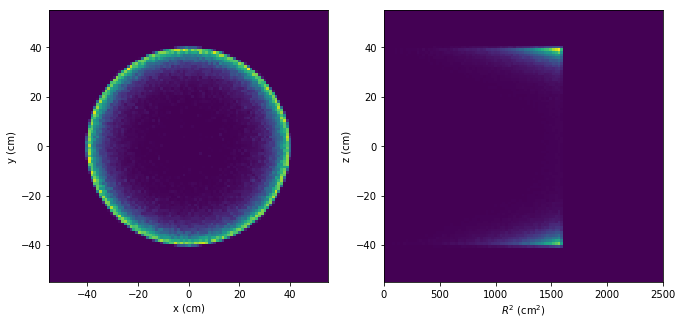

In [3]:
plt.figure(figsize=(11,5))
plt.subplot(1, 2, 1)
h=plt.hist2d(df['x'],df['y'],bins=(100,100),weights=df['w'],range=[[-55,55],[-55,55]])#,norm=LogNorm())
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.subplot(1,2,2)

r2 = df['x']**2+df['y']**2
h=plt.hist2d(r2,df['z'],bins=(101,101),weights=df['w'],range=[[0,2500],[-55,55]])#,norm=LogNorm())
plt.xlabel('$R^2$ (cm$^2$)')
plt.ylabel('z (cm)')

#plt.savefig('mc_plain.pdf')

In [4]:
import numpy as np
df1 = df[(df['de']<250) & (r2<1600) & (np.abs(df['z'])<40) & (df['n']==1)]  

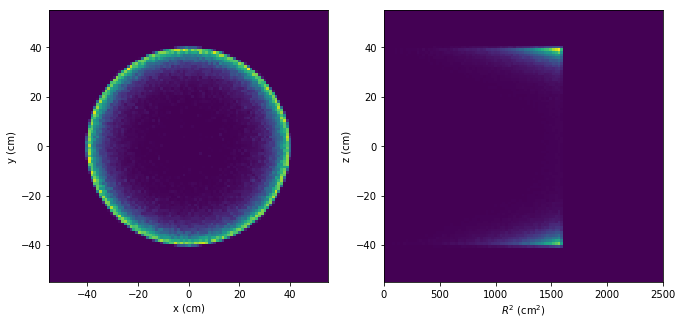

In [5]:
plt.figure(figsize=(11,5))
plt.subplot(1, 2, 1)
h=plt.hist2d(df1['x'],df1['y'],bins=(100,100),weights=df1['w'],range=[[-55,55],[-55,55]])
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.subplot(1,2,2)

r22 = df1['x']**2+df1['y']**2
h=plt.hist2d(r22,df1['z'],bins=(101,101),weights=df1['w'],range=[[0,2500],[-55,55]])
plt.xlabel('$R^2$ (cm$^2$)')
plt.ylabel('z (cm)');
plt.savefig('mc_plain_fiducial.pdf')

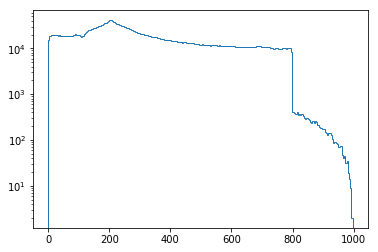

In [16]:
df2 = df[df['n']==3]
h = plt.hist(df2['de'],bins=250, histtype='step')
#plt.xlim([0,500])
plt.yscale('log')